# Assignment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

## Hemnet dataset
The Hemnet data contains information about the selling prices of villas in Landvetter that were sold in the
previous 12 months.

### 1
Find a linear regression model that relates the living area to the selling price. If in doing so, you
performed any data cleaning step(s), describe what you did and explain why.

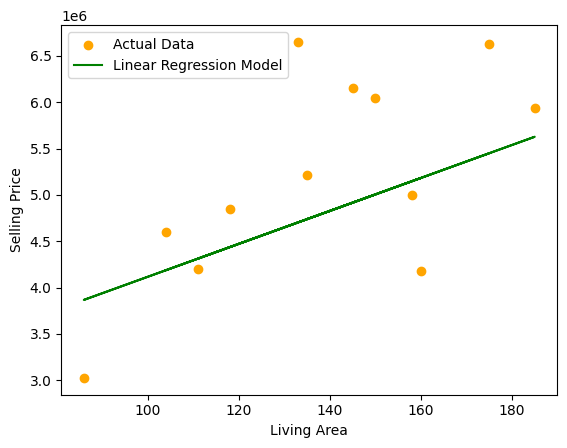

In [2]:
#Loading the data
data = pd.read_csv('hemnet.csv')

#Splitting the data
X = data['Living_area'].values.reshape(-1, 1)
y = data['Selling_price'].values

#Splitting the data as training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating and training regression model
model = LinearRegression()
model.fit(X_train, y_train)

#making predictions
y_pred = model.predict(X_test)

#visualizing
plt.scatter(X_test, y_test, color='Orange', label='Actual Data')
plt.plot(X_test, y_pred, color='Green', label='Linear Regression Model')
plt.xlabel('Living Area')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

Missing Values Before Cleaning:
ID               0
Living_area      0
Rooms            0
Land_size        0
Biarea           0
Age              0
Selling_price    0
dtype: int64


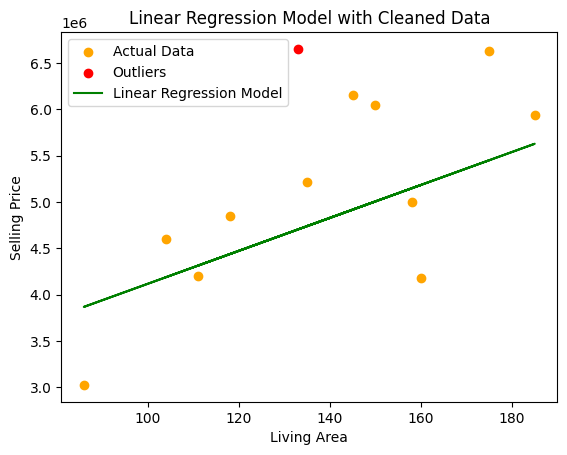

In [3]:
#Loading the data
data = pd.read_csv('hemnet.csv')
data = data.dropna()

#Displaying details about missing value
print("Missing Values Before Cleaning:")
print(data.isnull().sum())

#Outlier handelling
z_scores = np.abs(stats.zscore(data[['Living_area', 'Selling_price']]))
data_no_outliers = data[(z_scores < 3).all(axis=1)]

#Splitting the cleaned data
X_cleaned = data_no_outliers['Living_area'].values.reshape(-1, 1)
y_cleaned = data_no_outliers['Selling_price'].values

#Splitting the cleaned data as training data and testing data
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

#creating and training regression model based on the cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

#making predictions based on the cleaned data
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

#identifying outliers
residuals = y_test - y_pred
outliers = np.abs(residuals) > 2 * np.std(residuals)

#Visualizing the cleaned data
plt.scatter(X_test[~outliers], y_test[~outliers], color='Orange', label='Actual Data')
plt.scatter(X_test[outliers], y_test[outliers], color='Red', label='Outliers')
plt.plot(X_test, y_pred, color='Green', label='Linear Regression Model')
plt.xlabel('Living Area')
plt.ylabel('Selling Price')
plt.legend()
plt.title('Linear Regression Model with Cleaned Data')
plt.show()

### 2
What are the values of the slope and intercept of the regression line?

In [4]:
# Coefficient (slope)
slope = model.coef_[0]
# Intercept
intercept = model.intercept_

#Display the slope and intercept
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): 17779.865310713998
Intercept: 2337451.522426822


### 3
Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2, and
200 m2.

In [5]:
#Using the model to make predictions
living_areas_to_predict = np.array([100, 150, 200]).reshape(-1, 1)
predicted_prices = model.predict(living_areas_to_predict)

#Displaying the predictions
for living_area, predicted_price in zip([100, 150, 200], predicted_prices):
    print(f"Predicted Selling Price for {living_area} m^2: ${predicted_price:.2f}")

Predicted Selling Price for 100 m^2: $4115438.05
Predicted Selling Price for 150 m^2: $5004431.32
Predicted Selling Price for 200 m^2: $5893424.58


### 4
Draw a residual plot. Discuss some potential strategies for improving the model.

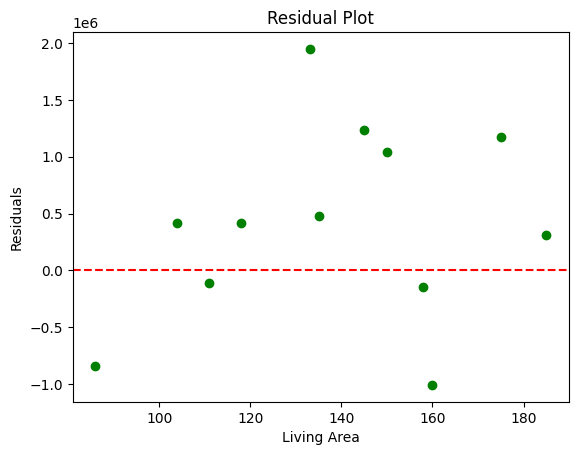

In [6]:
#Calculating the residuals
residuals = y_test - y_pred

#Creating the residual plot
plt.scatter(X_test, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Living Area')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


## Iris dataset

In [7]:
# load data
iris = load_iris()
x = iris.data
y = iris.target

# Split data into test data (25%) and training data (75%)
x_tr, x_te, y_tr, y_te = train_test_split(x, y, random_state = 0)

### 1
Use a confusion matrix to evaluate the use of logistic regression to classify the Iris data set.

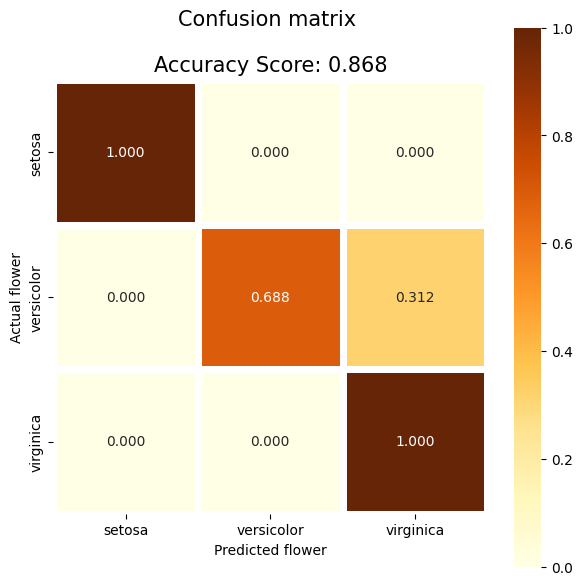

In [8]:

# Generate logisitc regression multiclass model
reg_mod = LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_tr,y_tr)

# Make classification prediction
y_pred = reg_mod.predict(x_te)

# Calculate model score (accuracy)
acc = reg_mod.score(x_te, y_te)

# Create a normalized confusion matrix
cm = confusion_matrix(y_te, y_pred, normalize='true')

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths=5, square=True, cmap='YlOrBr') #Fall themed
ax.set_xticklabels(iris.target_names)
ax.set_yticklabels(iris.target_names)

acc_score = 'Confusion matrix \n\nAccuracy Score: {:.3f}'.format(acc)

plt.ylabel('Actual flower')
plt.xlabel('Predicted flower')
plt.title(acc_score, size = 15)
plt.show()

### 2
Use k-nearest neighbors (k-NN) to classify the Iris data set with some different values for k, and
with uniform and distance-based weights. What will happen when k grows larger for the different
cases? Why?

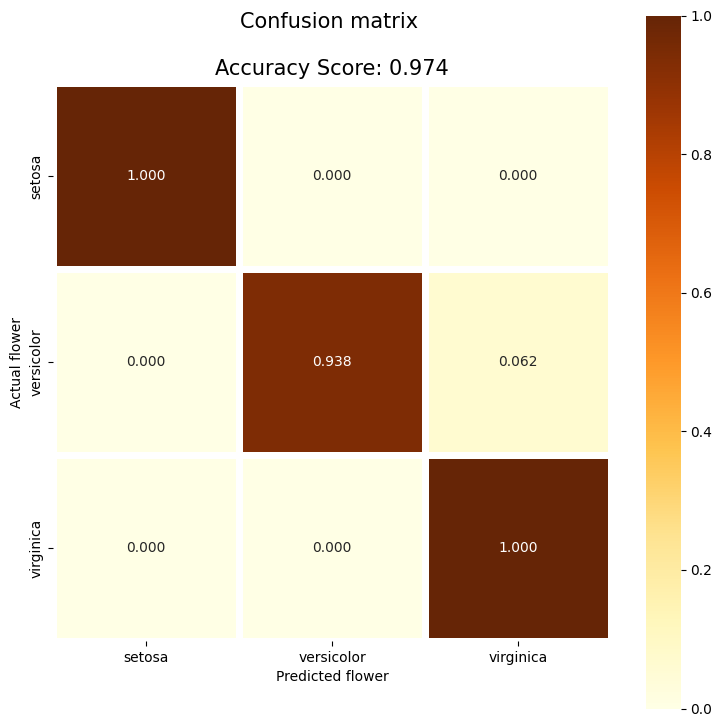

In [9]:
# Build a KNN classifier model
knn = KNeighborsClassifier(n_neighbors = 5).fit(x_tr, y_tr)

# Make predictions
y_pred = knn.predict(x_te)

# Accuracy and confusion matrix
acc = knn.score(x_te, y_te)
cm = confusion_matrix(y_te, y_pred, normalize='true')

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths=5, square=True, cmap='YlOrBr' )
ax.set_xticklabels(iris.target_names)
ax.set_yticklabels(iris.target_names)
acc_score = 'Confusion matrix \n\nAccuracy Score: {:.3f}'.format(acc)
plt.ylabel('Actual flower')
plt.xlabel('Predicted flower')
plt.title(acc_score, size = 15)
plt.show()

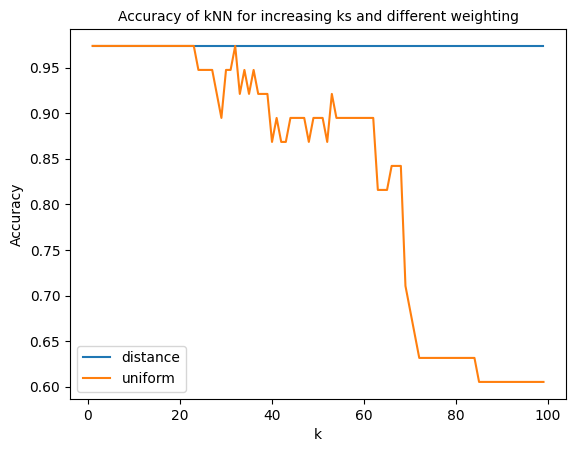

In [10]:
# Plot accuracies for different values of k

# Store accuracy of for each k, both for uniform and distance-based weights
acc_dist = []
acc_unif = []

for k in range(1, 100):
    knn_dist = KNeighborsClassifier(n_neighbors = k, weights = 'distance').fit(x_tr, y_tr)
    knn_unif = KNeighborsClassifier(n_neighbors = k, weights = 'uniform').fit(x_tr, y_tr)
    y_pred_dist = knn_dist.predict(x_te)
    y_pred_unif = knn_unif.predict(x_te)
    acc_dist.append(knn_dist.score(x_te, y_te))
    acc_unif.append(knn_unif.score(x_te, y_te))

# Plot accuracy for each k
plt.plot(range(1, 100), acc_dist, label = 'distance')
plt.plot(range(1, 100), acc_unif, label = 'uniform')

# Plot accuracy for each k

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN for increasing ks and different weighting', size = 10)
plt.legend()

### 3
Compare the classification models for the Iris data set that are generated by k-nearest neighbors
(for the different settings from question 2) and by logistic regression. Calculate confusion matrices
for these models and discuss the performance of the various models.

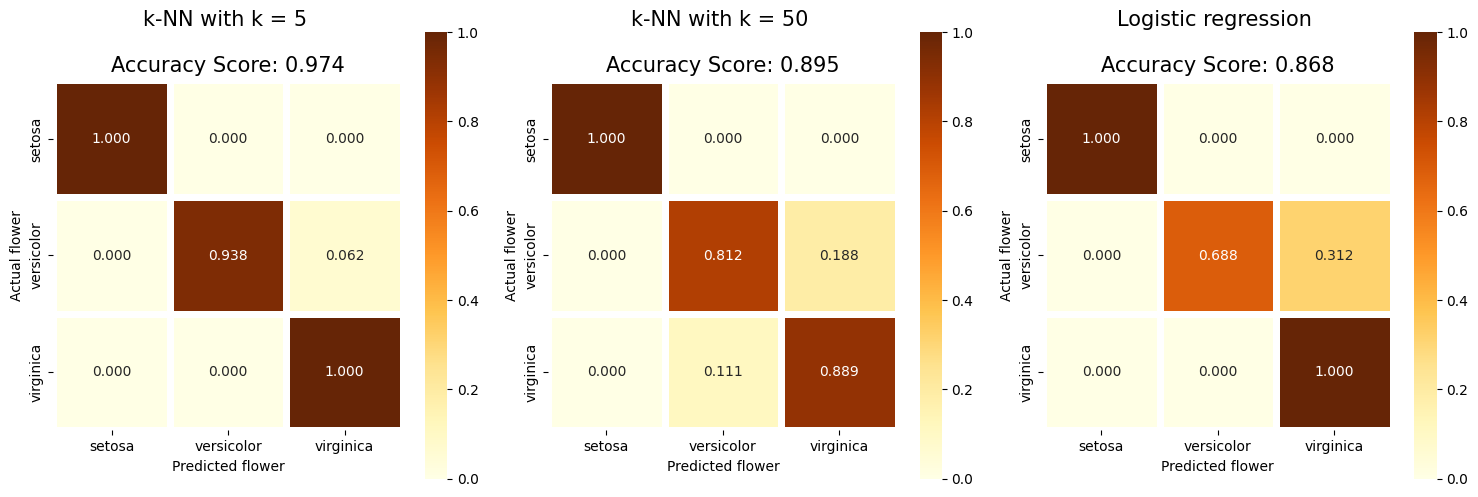

In [11]:
# Plot heatmap of confusion matrix for k = 5, k = 50, and logistic regression

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# k = 5
knn = KNeighborsClassifier(n_neighbors = 5).fit(x_tr, y_tr)
y_pred = knn.predict(x_te)
acc = knn.score(x_te, y_te)
cm = confusion_matrix(y_te, y_pred, normalize='true')
sns.heatmap(cm, annot = True, fmt=".3f", linewidths=5, square=True, cmap='YlOrBr', ax=axs[0])
axs[0].set_xticklabels(iris.target_names)
axs[0].set_yticklabels(iris.target_names)
acc_score = 'k-NN with k = 5 \n\nAccuracy Score: {:.3f}'.format(acc)
axs[0].set_ylabel('Actual flower')
axs[0].set_xlabel('Predicted flower')
axs[0].set_title(acc_score, size = 15)

# k = 50
knn = KNeighborsClassifier(n_neighbors = 50).fit(x_tr, y_tr)
y_pred = knn.predict(x_te)
acc = knn.score(x_te, y_te)
cm = confusion_matrix(y_te, y_pred, normalize='true')
sns.heatmap(cm, annot = True, fmt=".3f", linewidths=5, square=True, cmap='YlOrBr', ax=axs[1])
axs[1].set_xticklabels(iris.target_names)
axs[1].set_yticklabels(iris.target_names)
acc_score = 'k-NN with k = 50 \n\nAccuracy Score: {:.3f}'.format(acc)
axs[1].set_ylabel('Actual flower')
axs[1].set_xlabel('Predicted flower')
axs[1].set_title(acc_score, size = 15)

# Logistic regression
reg_mod = LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_tr,y_tr)
y_pred = reg_mod.predict(x_te)
acc = reg_mod.score(x_te, y_te)
cm = confusion_matrix(y_te, y_pred, normalize='true')
sns.heatmap(cm, annot = True, fmt=".3f", linewidths=5, square=True, cmap='YlOrBr', ax=axs[2])
axs[2].set_xticklabels(iris.target_names)
axs[2].set_yticklabels(iris.target_names)
acc_score = 'Logistic regression \n\nAccuracy Score: {:.3f}'.format(acc)
axs[2].set_ylabel('Actual flower')
axs[2].set_xlabel('Predicted flower')
axs[2].set_title(acc_score, size = 15)

# Display the figure with the subplots
plt.tight_layout()
plt.show()